# TEMIS UV Dose Data — Explorer
Vitamin-D UV dose (cloud-free & cloud-modified) — world, 2025

In [1]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

filepath = Path("~/Downloads/uvdvcclim_world.nc").expanduser()
ds = xr.open_dataset(filepath, group="PRODUCT")
ds

<xarray.Dataset>
Dimensions:            (latitude: 720, longitude: 1440, corner: 4, days: 365)
Coordinates:
  * latitude           (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude          (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * corner             (corner) float32 0.0 1.0 2.0 3.0
  * days               (days) float64 1.0 2.0 3.0 4.0 ... 363.0 364.0 365.0
Data variables: (12/15)
    latitude_index     (latitude) float64 ...
    longitude_index    (longitude) float64 ...
    latitude_bounds    (latitude, corner) float32 ...
    longitude_bounds   (longitude, corner) float32 ...
    date               (days) float64 ...
    date_string        (days) object ...
    ...                 ...
    uvd_clear_min      (days, latitude, longitude) float32 ...
    uvd_clear_max      (days, latitude, longitude) float32 ...
    uvd_cloudy_mean    (days, latitude, longitude) float32 ...
    uvd_cloudy_stddev  (days, latitude, longitude) float32 ...
    uvd_cloudy_min     (days, latitude, longitude) float32 ...
    uvd_cloudy_max     (days, latitude, longitude) float32 ...

## Point query — Sydney, 1 October 2025

In [2]:
sydney = ds.sel(latitude=-33.8688, longitude=151.2093, days=274, method="nearest")
sydney.load()
sydney

<xarray.Dataset>
Dimensions:            (corner: 4)
Coordinates:
    latitude           float32 -33.88
    longitude          float32 151.1
  * corner             (corner) float32 0.0 1.0 2.0 3.0
    days               float64 274.0
Data variables: (12/15)
    latitude_index     float64 224.0
    longitude_index    float64 1.324e+03
    latitude_bounds    (corner) float32 -34.0 -33.75 -33.75 -34.0
    longitude_bounds   (corner) float32 151.2 151.2 151.0 151.0
    date               float64 1.001e+03
    date_string        object '1001'
    ...                 ...
    uvd_clear_min      float32 4.784
    uvd_clear_max      float32 6.696
    uvd_cloudy_mean    float32 nan
    uvd_cloudy_stddev  float32 nan
    uvd_cloudy_min     float32 nan
    uvd_cloudy_max     float32 nan

## Global UV dose map — 1 October 2025

/var/folders/4s/cz0zwpds1ss7wtzxp6511p880000gn/T/ipykernel_76714/2174619507.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


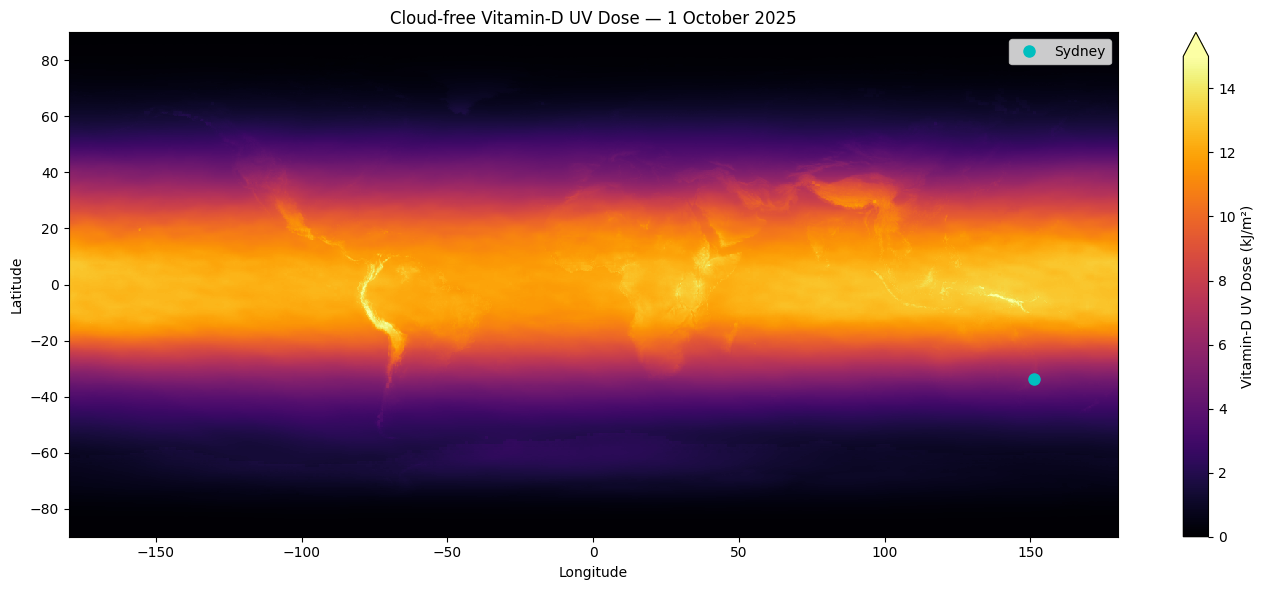

In [ ]:
day_slice = ds["uvd_clear_mean"].sel(days=274)

fig, ax = plt.subplots(figsize=(14, 6))
day_slice.plot(ax=ax, cmap="inferno", vmin=0, vmax=15, cbar_kwargs={"label": "Vitamin-D UV Dose (kJ/m²)"})
ax.set_title("Cloud-free Vitamin-D UV Dose — 1 October 2025")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.plot(151.21, -33.87, "co", markersize=8, label="Sydney")
ax.legend()
plt.tight_layout()
plt.show()

## Sydney — UV dose over the full year

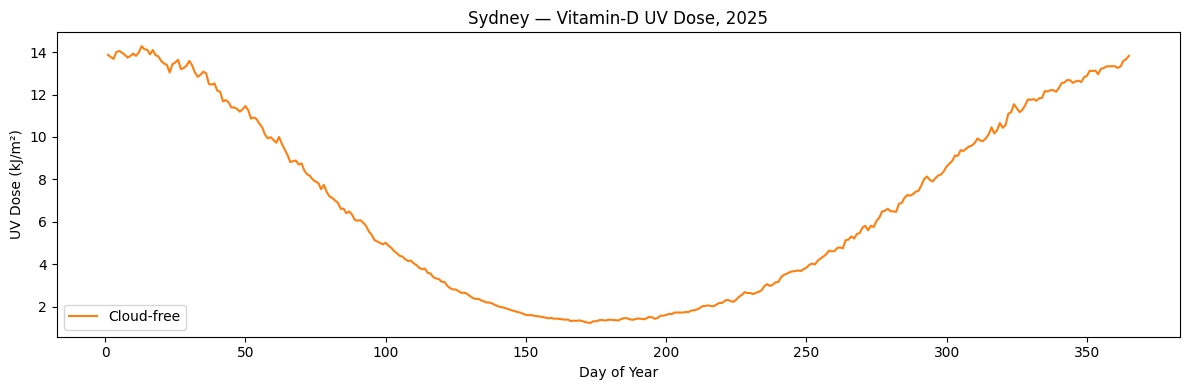

In [4]:
sydney_year = ds.sel(latitude=-33.8688, longitude=151.2093, method="nearest")

fig, ax = plt.subplots(figsize=(12, 4))
sydney_year["uvd_clear_mean"].plot(ax=ax, label="Cloud-free", color="tab:orange")
ax.set_title("Sydney — Vitamin-D UV Dose, 2025")
ax.set_xlabel("Day of Year")
ax.set_ylabel("UV Dose (kJ/m²)")
ax.legend()
plt.tight_layout()
plt.show()

## Annual mean UV dose — global

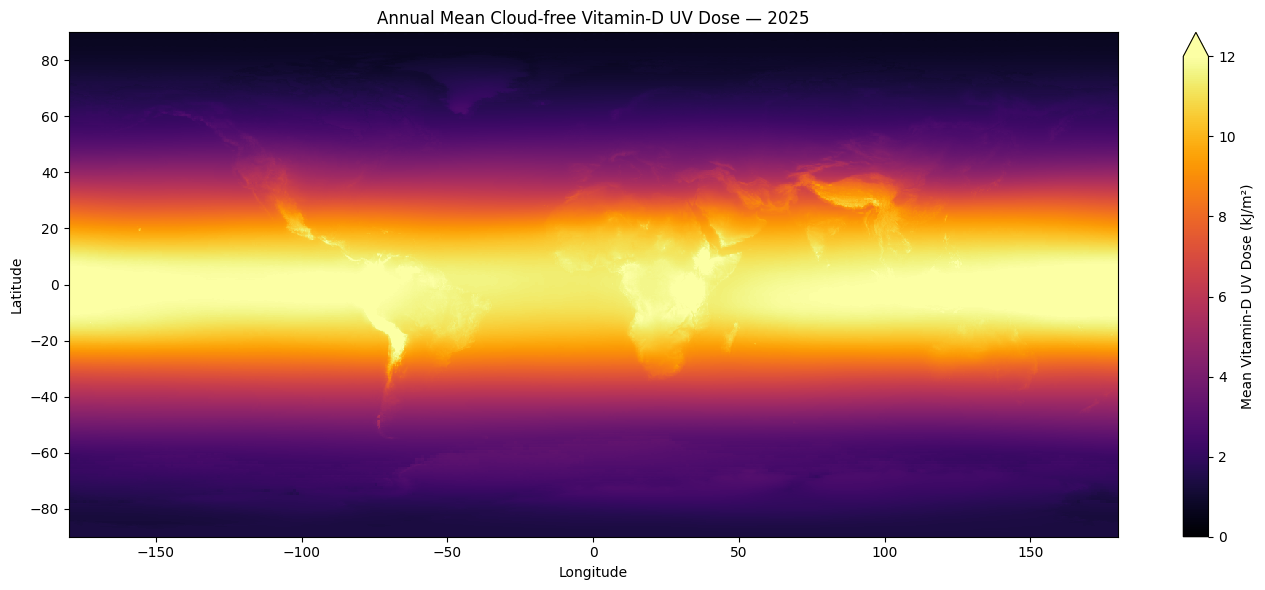

In [5]:
annual_mean = ds["uvd_clear_mean"].mean(dim="days")

fig, ax = plt.subplots(figsize=(14, 6))
annual_mean.plot(ax=ax, cmap="inferno", vmin=0, vmax=12, cbar_kwargs={"label": "Mean Vitamin-D UV Dose (kJ/m²)"})
ax.set_title("Annual Mean Cloud-free Vitamin-D UV Dose — 2025")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

## Check missing data for Sydney

In [6]:
sydney_year = ds.sel(latitude=-33.8688, longitude=151.2093, method="nearest")
uvd = sydney_year["uvd_clear_mean"].load()

total_days = uvd.sizes["days"]
nan_count = int(uvd.isnull().sum())
valid_count = total_days - nan_count

print(f"Total days:   {total_days}")
print(f"Valid values: {valid_count}")
print(f"Missing (NaN): {nan_count}")
print(f"Coverage:     {valid_count / total_days:.1%}")

nan_days = uvd.days.values[uvd.isnull().values]
print(f"\nMissing day numbers: {nan_days}")

dates = sydney_year["date"].load()
nan_dates = dates.values[uvd.isnull().values]
print(f"Missing dates: {nan_dates.astype(int)}")

Total days:   365
Valid values: 365
Missing (NaN): 0
Coverage:     100.0%

Missing day numbers: []
Missing dates: []
